In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [3]:
df_train = pd.read_csv('train.csv')
df_eval = pd.read_csv('eval.csv')
y_train = df_train.pop('survived')
y_eval = df_eval.pop('survived')

In [5]:
df_train.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [8]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [9]:
df_train.shape

(627, 9)

In [11]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

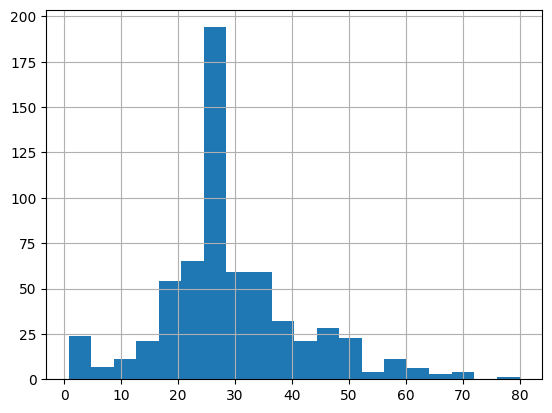

In [12]:
df_train.age.hist(bins=20)

<Axes: ylabel='sex'>

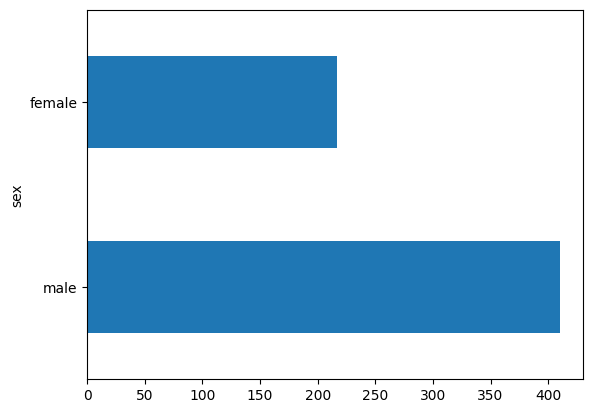

In [13]:
df_train.sex.value_counts().plot(kind = 'barh')

<Axes: ylabel='class'>

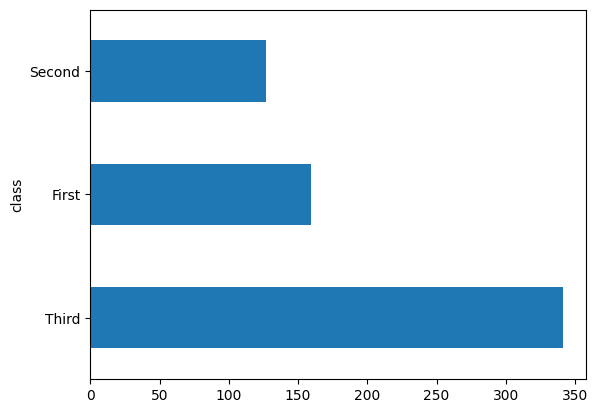

In [14]:
df_train['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '%survive')

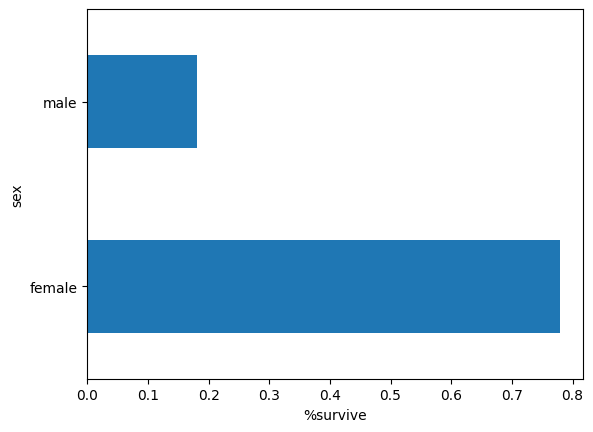

In [15]:
pd.concat([df_train, y_train], axis = 1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('%survive')

In [25]:
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
numeric_columns = ['age', 'fare']
feature_columns = []
for feature_name in categorical_columns:
    vocabulary = df_train[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
for feature_name in numeric_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), Voc

In [31]:
def make_input_func(data_df,label_df, num_epochs = 10, shuffle = True, batch_size = 32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function
train_input_fun = make_input_func(df_train, y_train)
eval_input_fun = make_input_func(df_eval, y_eval, num_epochs = 1, shuffle = False)

In [32]:
linear_est= tf.estimator.LinearClassifier(feature_columns=feature_columns)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\STAGTE~1\\AppData\\Local\\Temp\\tmp7mgkt415', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', 

In [37]:
linear_est.train(train_input_fun)
result = linear_est.evaluate(eval_input_fun)

#clear_output()
print(result['accuracy'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STAGTE~1\AppData\Local\Temp\tmp7mgkt415\model.ckpt-400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400...
INFO:tensorflow:Saving checkpoints for 400 into C:\Users\STAGTE~1\AppData\Local\Temp\tmp7mgkt415\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 400...
INFO:tensorflow:loss = 0.45609912, step = 400
INFO:tensorflow:global_step/sec: 140.487
INFO:tensorflow:loss = 0.6536143, step = 500 (0.712 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 600...
INFO:tensorflow:Saving checkpoints for 600 into C:\Users\STAGTE~1\AppData\Local\Temp\tmp7mgkt415\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpo

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\STAGTE~1\AppData\Local\Temp\tmp7mgkt415\model.ckpt-600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Axes: title={'center': 'predicted Probabilites'}, ylabel='Frequency'>

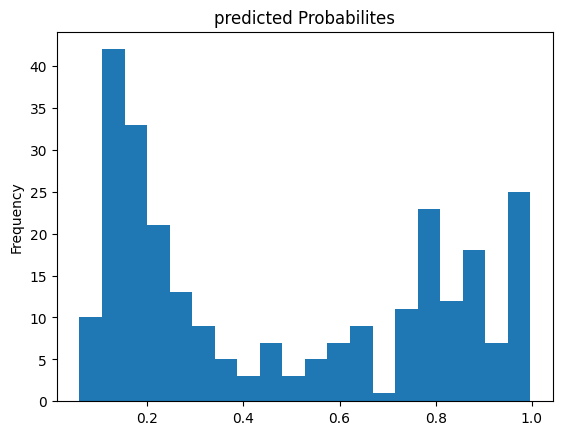

In [38]:
pred_dicts = list(linear_est.predict(eval_input_fun))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind = 'hist', bins = 20, title = 'predicted Probabilites')